# Cox生存分析

* `mydir`：自己的数据
* `ostime_column`: 数据对应的生存时间，不一定非的是OST，也可以是DST、FST等。
* `os`：生存状态，不一定非的是OS，也可以是DS、FS等。

In [1]:
import pandas as pd

data = []
cohorts = ['Training', 'Internal', 'External A', 'External B', 'External C']
for sur in ['OS', 'PFS']:
    for cohort in cohorts:
        d = pd.read_excel(f'data/{sur} {cohort}.xlsx')[['case_id', 'risk', 'survival', 'event', 'risk_group']]
        d['survival_type'] = sur
        d['cohort'] = cohort
        data.append(d)
data = pd.concat(data, axis=0)
data.to_csv('data/joinit_info_HR.csv', index=False)
data

,case_id,risk,survival,event,risk_group,survival_type,cohort
0,1,3.955410,106.4,0,High Risk,OS,Training
1,10,1.023497,22.3,1,High Risk,OS,Training
2,1000,4.000000,8.4,0,Low Risk,OS,Training
3,1002,4.000000,45.3,0,Low Risk,OS,Training
4,1005,3.999761,45.7,0,High Risk,OS,Training
...,...,...,...,...,...,...,...
18,58,2.905163,8.0,0,Low Risk,PFS,External C
19,60,2.147963,14.5,0,High Risk,PFS,External C
20,61,2.841876,18.0,0,Low Risk,PFS,External C
21,62,2.838130,12.1,0,Low Risk,PFS,External C


In [13]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.utils import concordance_index
import numpy as np

metrics = []
for sur in ['OS', 'PFS']:
    metric = []
    for subset in cohorts:
        subdata = data[(data['cohort'] == subset) & (data['survival_type'] == sur)].dropna(axis=1)
        metric.append(concordance_index(subdata['survival'], subdata['risk'], subdata[f"event"]))
    metrics.append(metric)
metrics = pd.DataFrame(np.array(metrics).T, columns=['OS', 'PFS'])
metrics['Cohort'] = cohorts
metrics

,OS,PFS,Cohort
0,0.982674,0.919184,Training
1,0.845124,0.876912,Internal
2,0.835812,0.847920,External A
3,0.827703,0.760297,External B
4,0.780000,0.792793,External C


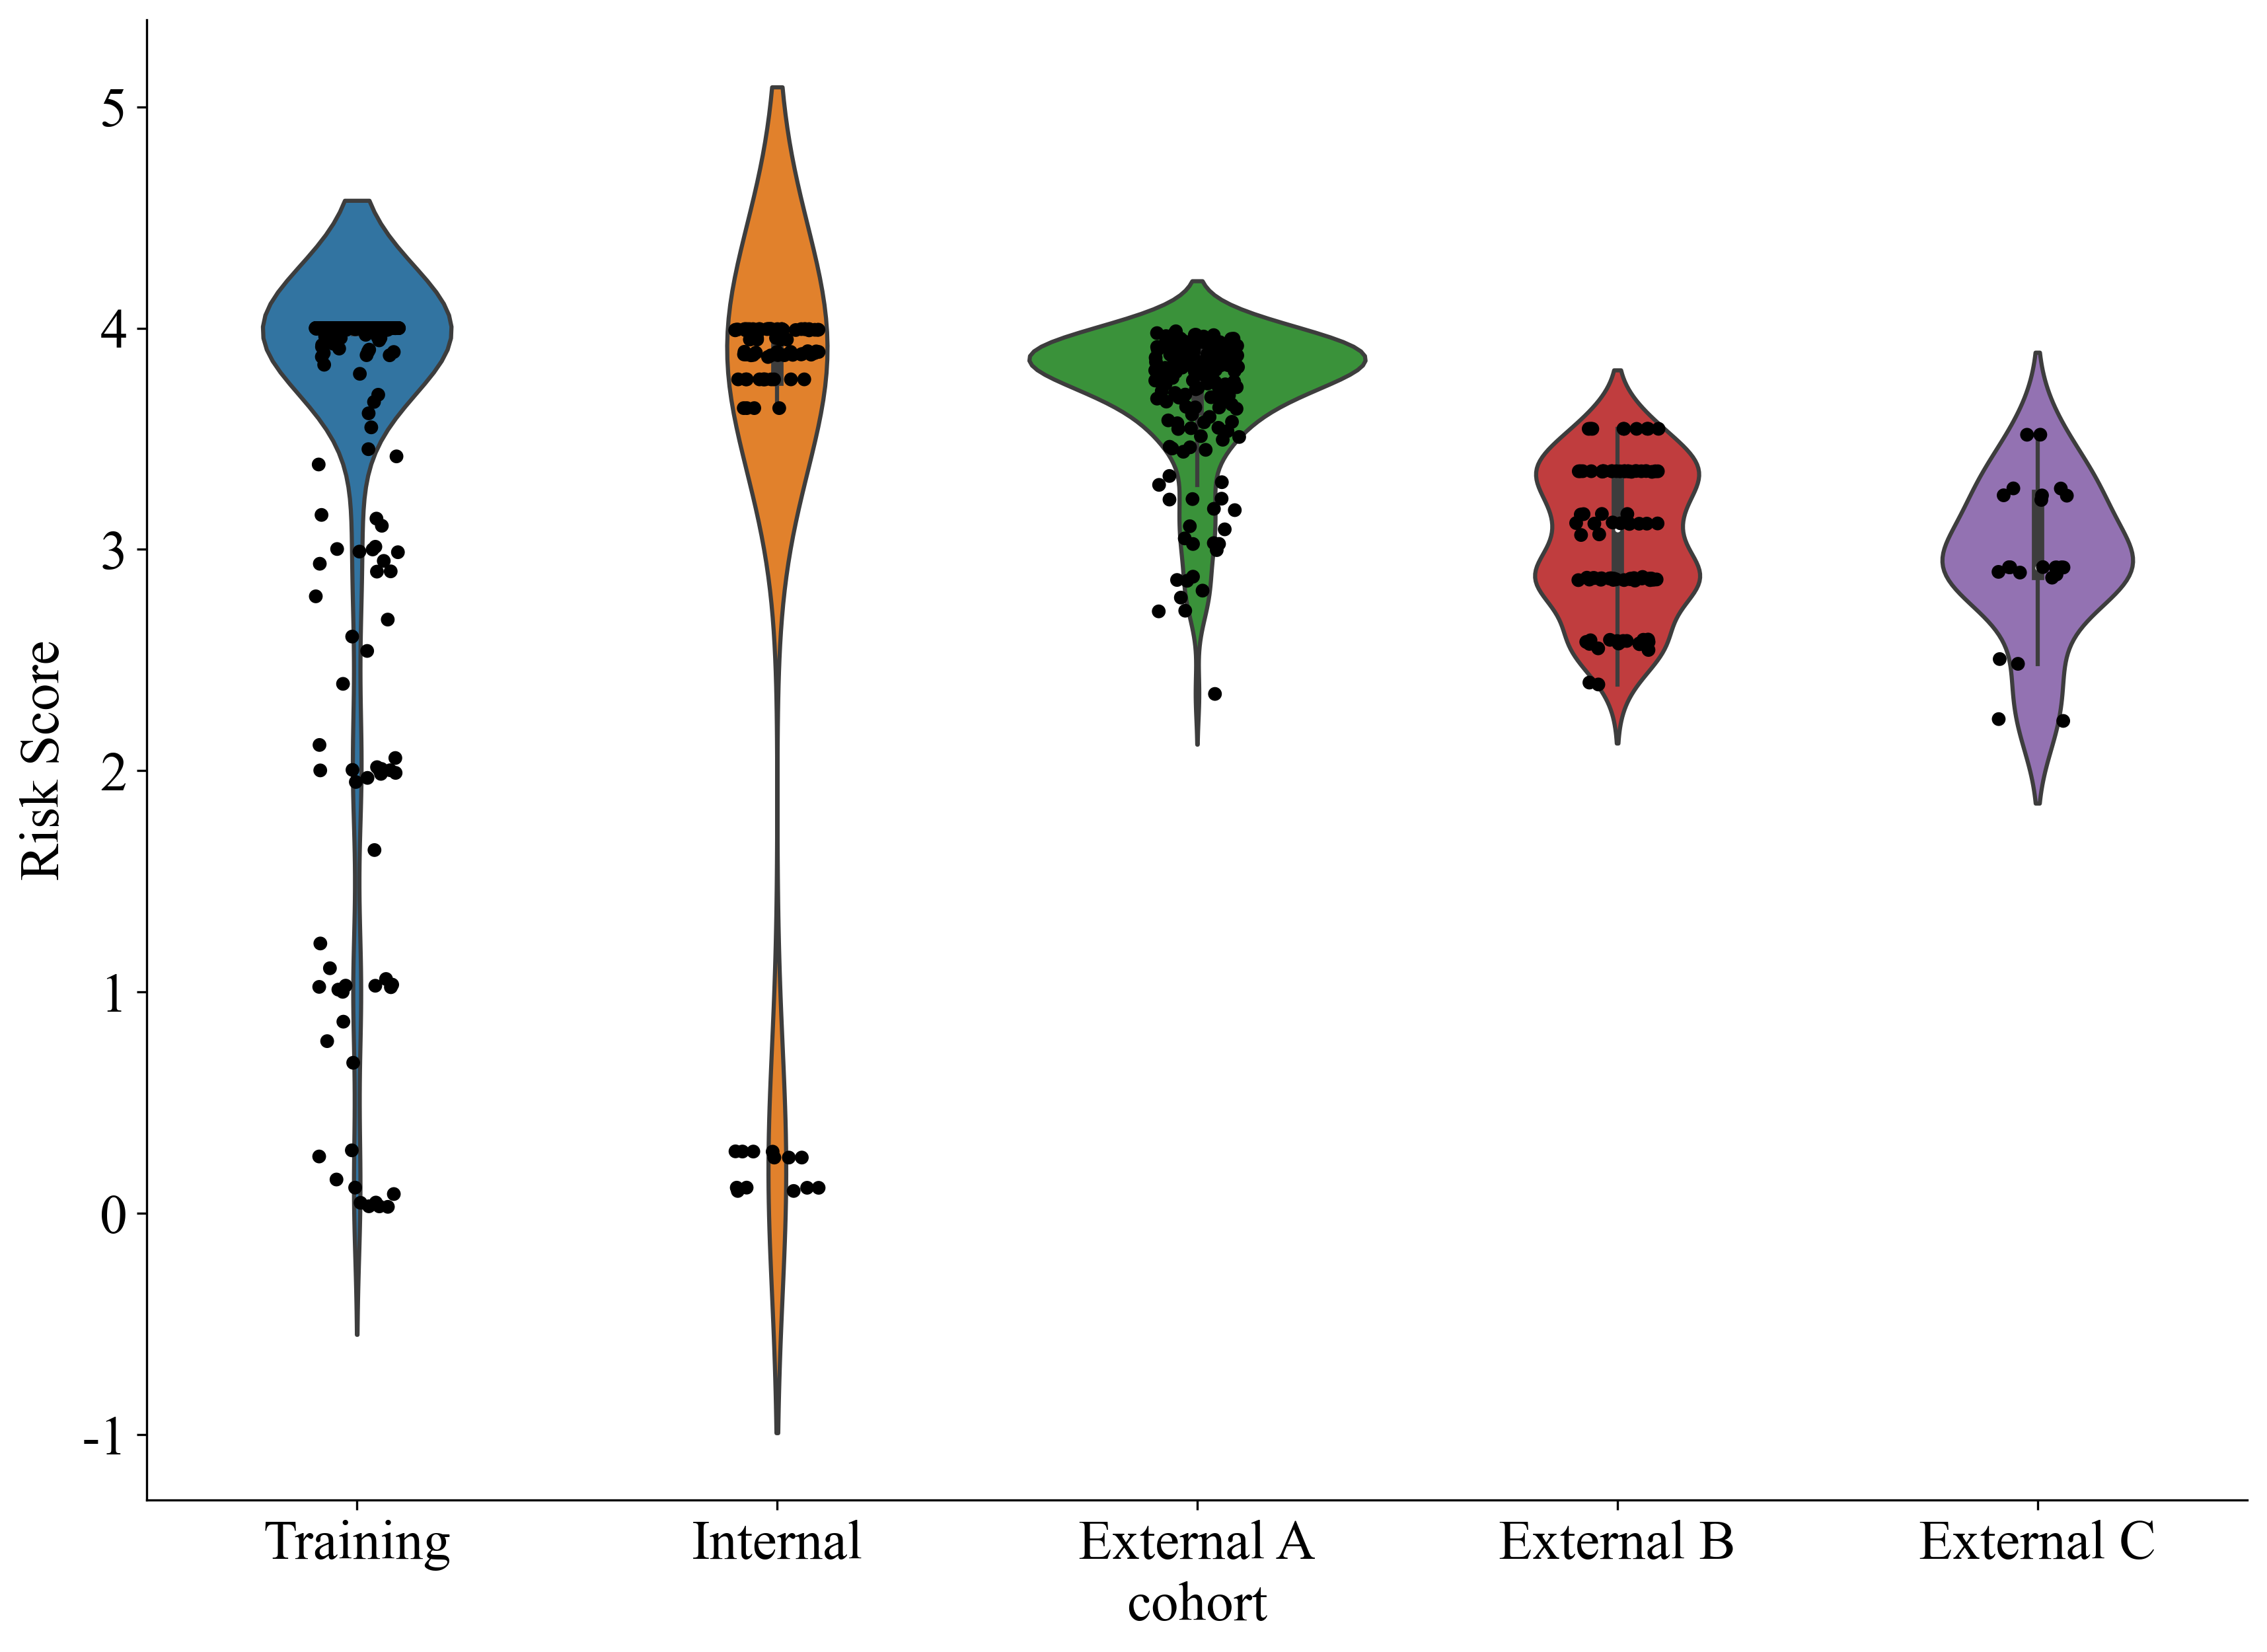

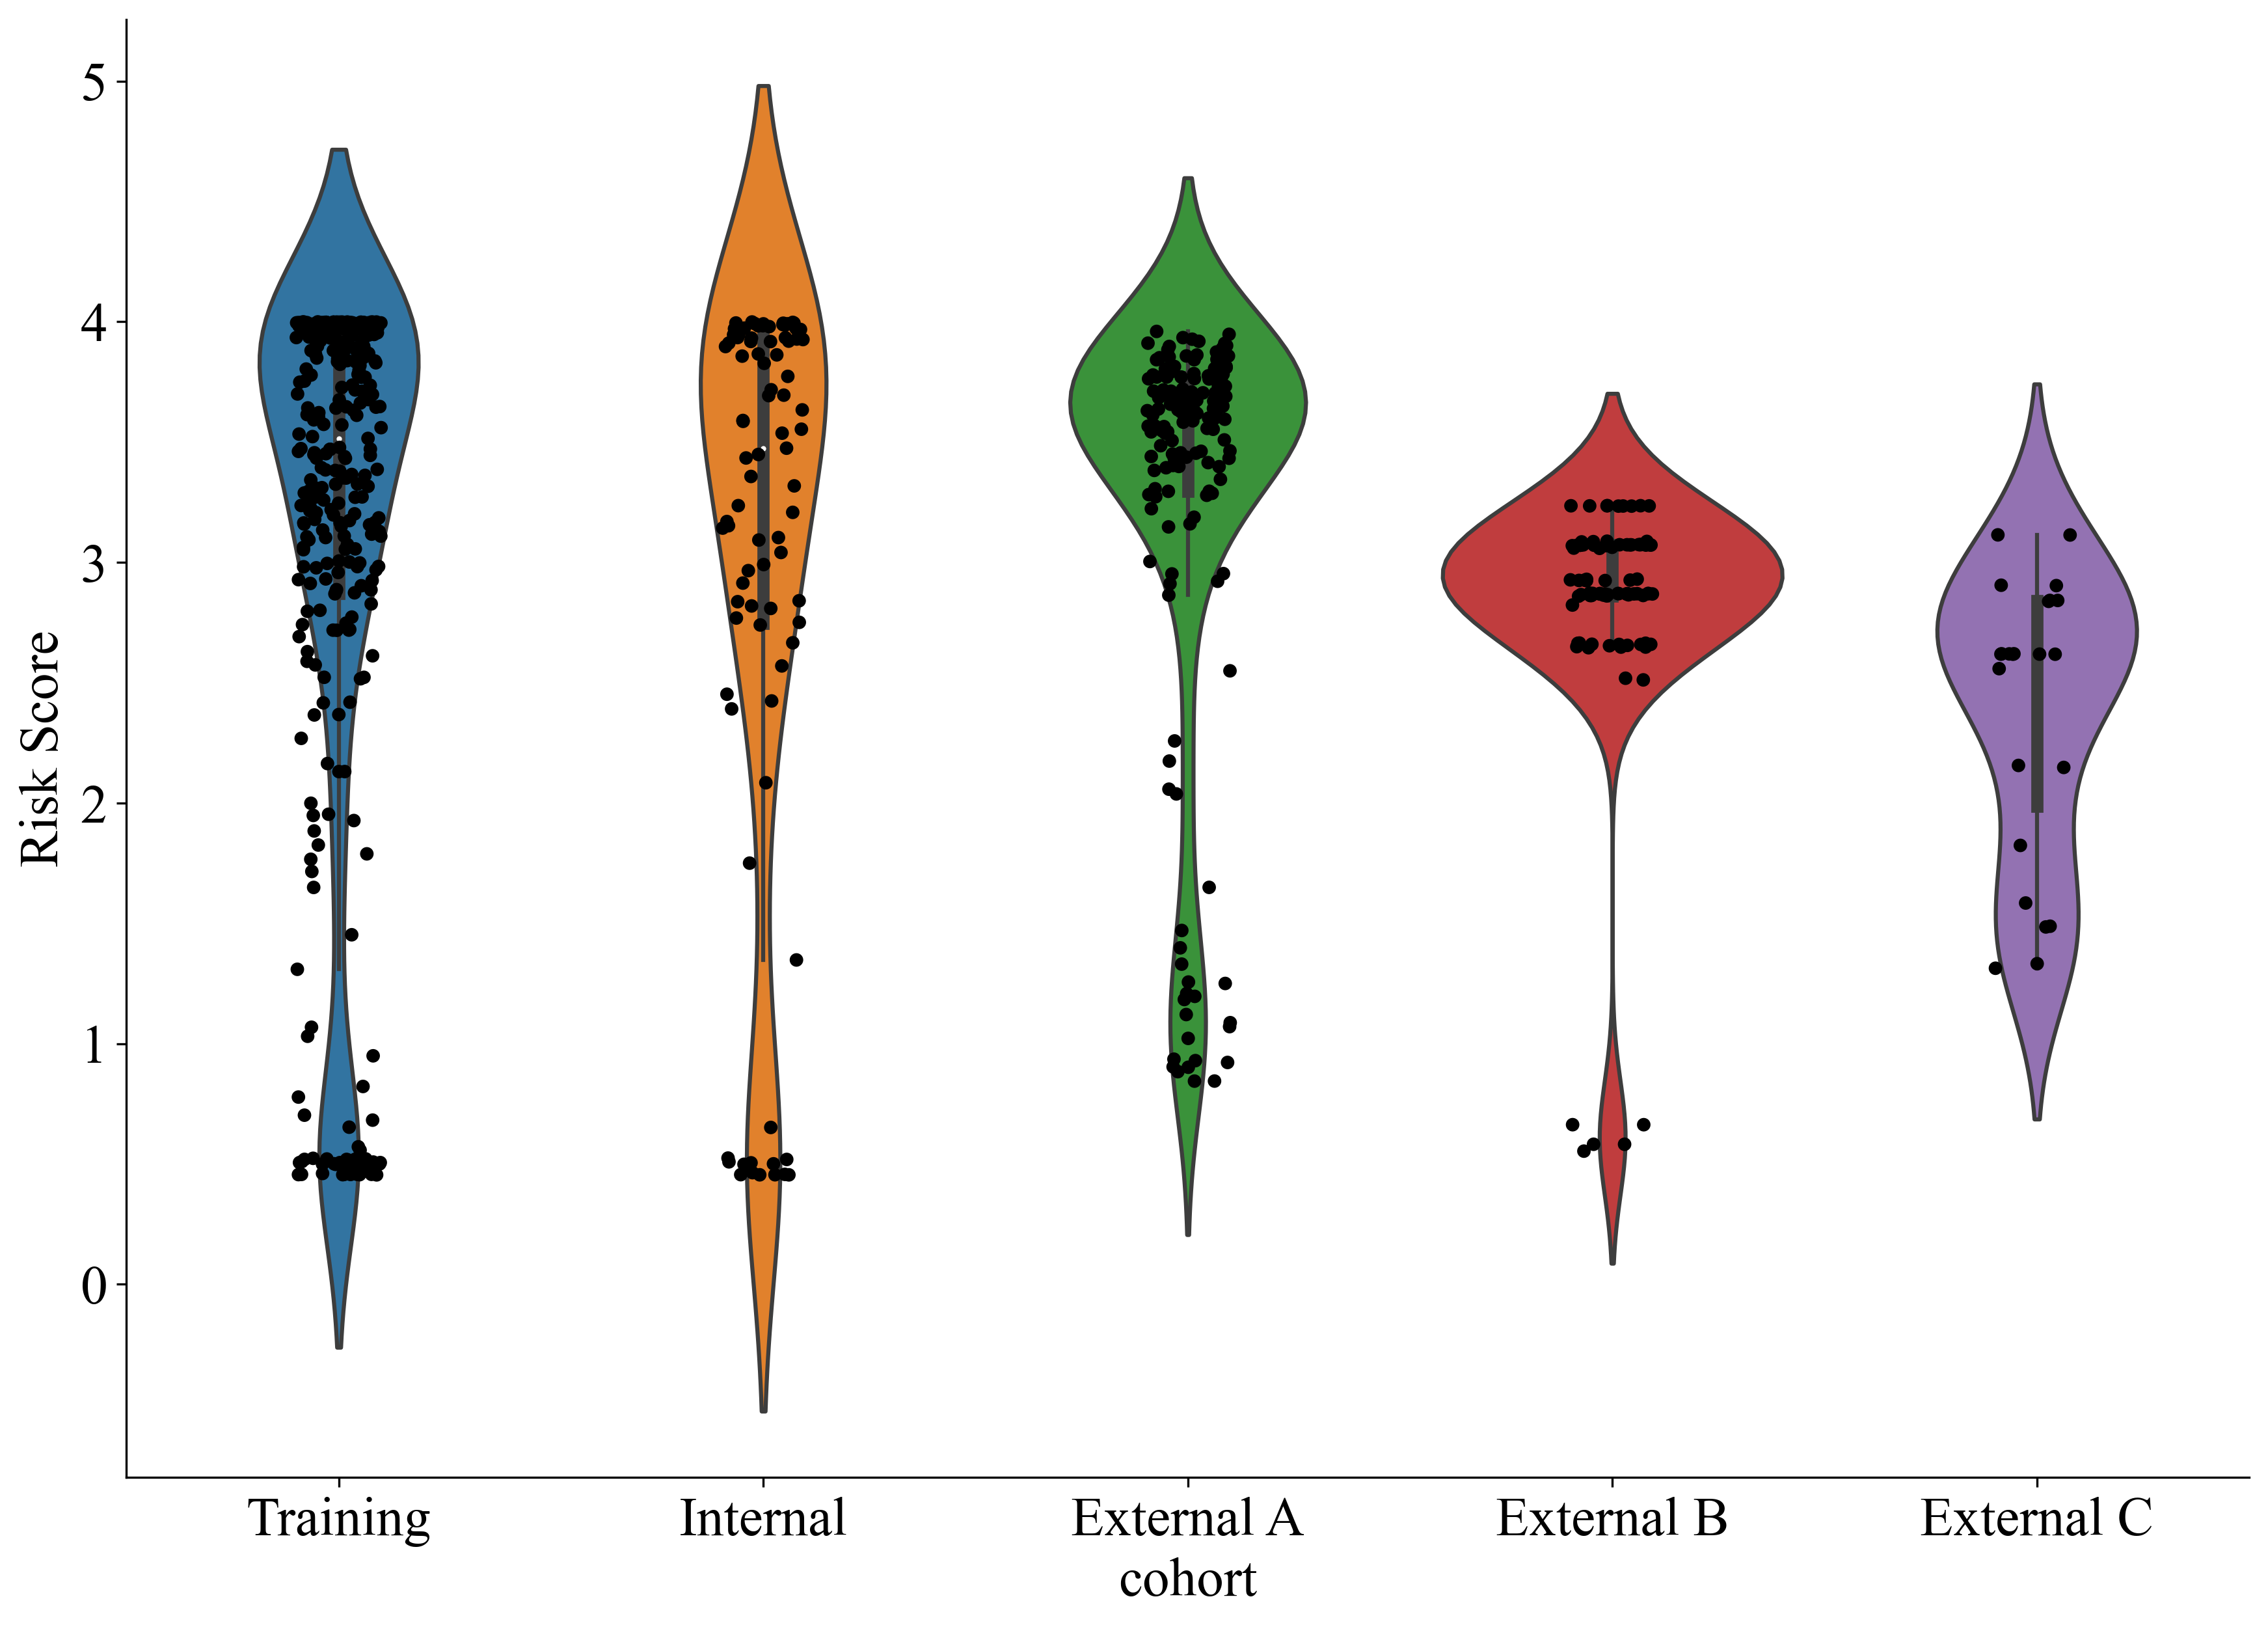

In [22]:
from lifelines import CoxPHFitter
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter
from lifelines.plotting import add_at_risk_counts
from lifelines.utils import concordance_index
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import onekey_algo

data['Risk Score'] = data['risk']
for sur in ['OS', 'PFS']:
    subdata = data[data['survival_type'] == sur]
    g = sns.catplot(y="Risk Score", x="cohort", data=subdata, kind="violin",)
    g.fig.set_size_inches(15,10)
    ax = g.axes.flat[0]  # 获取第一个axes对象
    ax.set_xlabel('Species')
    ax.set_ylabel('Sepal Length')
    sns.stripplot(y="Risk Score", x="cohort", data=subdata, ax=g.ax, color='black')
    plt.xticks(labels=None)
#     plt.yticks('Risk Score')
    plt.savefig(f'img/{sur}_feature_stats.svg', bbox_inches = 'tight')
    plt.show()